In [1]:
# check the current python version, make sure this is the one that with HDDM correctly installed
import sys
sys.executable

'C:\\Users\\hcp47\\Anaconda3\\envs\\jmatlab\\python.exe'

### Stim-coding HDDM for Matching task
This is the script for the drift diffusion model analysis used in Hu, etal, in prep.
This experiment included two tasks: matching judgment and categorization.
This script used for HDDM analysis of matching task, using stim-coding.

In [2]:
%matplotlib inline

# Preparation
import os, hddm, time, csv
import datetime

# import the toolbox
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
# plt.rcParams['image.cmap'] = 'viridis'  # change default colormap

#from cycler import cycler
# use 8 colors for 8 conditions of this study.
# plt.rcParams['axes.prop_cycle'] = cycler(color=['C0','C1','C2','C3','C4', 'C5', 'C6', 'C7'])
#import matplotlib as mpl
#plt.rcParams['axes.prop_cycle'] = mpl.cycler('color',
#                                             ['#332288','#CC6677','#DDCC77','#117733','#88CCEE', '#AA4499', '#44AA99', '#999933'])

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmykw')

C:\Users\hcp47\Anaconda3\envs\jmatlab\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
# load data from cateogriztion based on moral valence
dat_M_match = hddm.load_csv('MS_match_hddm_stim.csv')

# dat_M_match.head(10)  # uncomment this line to check the head of the data

# plot and save the distribution of raw data:
#fig = plt.figure()
#ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
#for i, subj_data in dat_M_match.groupby('subj_idx'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('plot_MS_dat_M_match.pdf')

In [4]:
nsample = 10000    # number of sampling
nburn   = 1000     # number of burn

In [6]:
start_time = time.time()  # the start time of the processing
 
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

#### model 1 for valence based categorization, free v,t,z
dbname = "M_match_vtz_s_" + dateToday + '_Chain_' +  str(nchain + 2) + '.db'
M_match_vtz_s = hddm.HDDMStimCoding(dat_M_match, include='z', stim_col='stim', 
                                        depends_on = {'v':['match','val','id'], 't':['match','val','id']},
                                        split_param='v', drift_criterion=False)
M_match_vtz_s.find_starting_values()
M_match_vtz_s.sample(nsample, burn = nburn, dbname=dbname, db='pickle')
   
# save the model
M_match_vtz_s.save("M_match_vtz_s_" + dateToday + '_Chain_' + str(nchain+2))
# M_match_vtz_s = hddm.load('M_match_vtz_s_2019-01-25_Chain_73372')

 [-----------------100%-----------------] 339 of 336 complete in 4908.3 secM_match_vtz_s DIC: -2329.829903
Running M1 used: 10842.368886 


Check the model fitting using PPC and DIC:

In [ ]:
## calculate the posterior preditive check (ppc)
ppc_data_match_vtz_s = hddm.utils.post_pred_gen(M_match_vtz_s)
ppc_compare_match_vtz_s = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_vtz_s)  # MSE 
ppc_compare_match_vtz_s.to_csv('ppc_compare_match_vtz_s.csv', sep = ',')
#M_Categ_val_vtz_s.plot_posterior_predictive()

## plot the posterior for each condition
# M_match_vatz.plot_posterior_quantiles()
# M_match_vatz.plot_posteriors_conditions()
# M_match_vatz_data =  M_match_vatz.gen_stats

## print DIC
print("M_match_vtz_s DIC: %f" % M_match_vtz_s.dic)  #

## print the time used for modelling
m1_time = time.time() # the start time of the processing
print("Running M1 used: %f " % (m1_time - start_time))

In [3]:
## load the stored data (after modeling)
M_match_vtz_s = hddm.load('M_match_vtz_s_2019-01-29_Chain_3') # change the name to the correct one if failed
print("M_match_vtz_s DIC: %f" % M_match_vtz_s.dic)  #-2329.8

M_match_vtz_s DIC: -2329.829903


In [5]:
start_time = time.time()  # the start time of the processing
 
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

# model 2, free v,z
dbname = "M_match_vz_s_"
M_match_vz_s = hddm.HDDMStimCoding(dat_M_match, include='z', stim_col='stim', 
                                       depends_on = {'v':['match','val','id']},
                                       split_param='v', drift_criterion=False)
M_match_vz_s.find_starting_values()
M_match_vz_s.sample(nsample, burn = nburn, dbname=dbname + '.db', db='pickle')
M_match_vz_s.save(dbname)

## ppc
ppc_data_match_vz_s = hddm.utils.post_pred_gen(M_match_vz_s)
ppc_compare_match_vz_s = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_vz_s)  # MSE 
ppc_compare_match_vz_s.to_csv('ppc_compare_Categ_val_vz_s.csv', sep = ',')

#M_Categ_vt.plot_posterior_predictive()
# M_Categ_vt.plot_posterior_quantiles()

## DIC
print("M_match_vz_s DIC: %f" % M_match_vz_s.dic) #  -14603.634512

## print the time used for modelling
m1_time = time.time() # the start time of the processing
print("Running M1 used: %f " % (m1_time - start_time))

 [-----------------100%-----------------] 339 of 336 complete in 4855.0 secM_match_vz_s DIC: 5590.146547
Running M1 used: 9664.983464 


Below are the results.

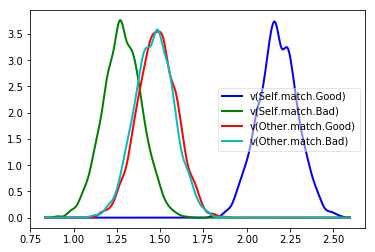

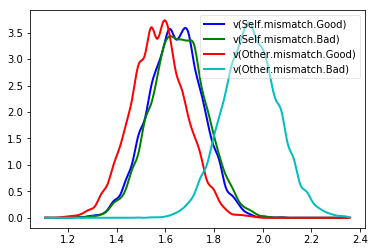

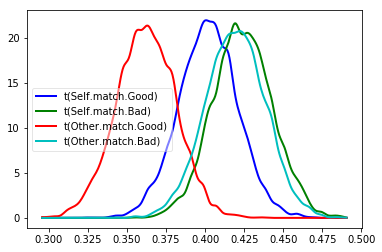

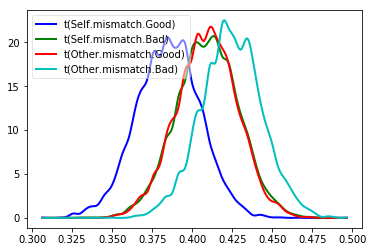

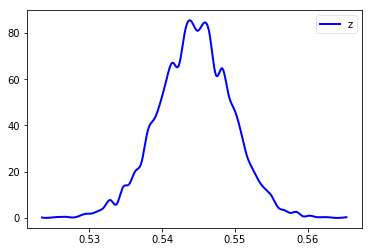

In [5]:
## drift rate
v_GoodSelf_val,v_BadSelf_val, v_GoodOther_val, v_BadOther_val, v_GoodSelf_val_nm,v_BadSelf_val_nm, v_GoodOther_val_nm, v_BadOther_val_nm  = M_match_vtz_s.nodes_db.node[['v(Self.match.Good)',
'v(Self.match.Bad)','v(Other.match.Good)','v(Other.match.Bad)','v(Self.mismatch.Good)','v(Self.mismatch.Bad)','v(Other.mismatch.Good)','v(Other.mismatch.Bad)']]
hddm.analyze.plot_posterior_nodes([v_GoodSelf_val,v_BadSelf_val, v_GoodOther_val, v_BadOther_val])
plt.savefig('ex7_rep_match_vtz_s_v3_m.pdf')

hddm.analyze.plot_posterior_nodes([v_GoodSelf_val_nm,v_BadSelf_val_nm, v_GoodOther_val_nm, v_BadOther_val_nm])
plt.savefig('ex7_rep_match_vtz_s_v3_nm.pdf')


## non-decision time
t_GoodSelf_val,t_BadSelf_val, t_GoodOther_val, t_BadOther_val, t_GoodSelf_val_nm,t_BadSelf_val_nm, t_GoodOther_val_nm, t_BadOther_val_nm  = M_match_vtz_s.nodes_db.node[['t(Self.match.Good)',
't(Self.match.Bad)','t(Other.match.Good)','t(Other.match.Bad)','t(Self.mismatch.Good)','t(Self.mismatch.Bad)','t(Other.mismatch.Good)','t(Other.mismatch.Bad)']]
hddm.analyze.plot_posterior_nodes([t_GoodSelf_val,t_BadSelf_val, t_GoodOther_val, t_BadOther_val])
plt.savefig('ex7_rep_match_vtz_s_t_3_m.pdf')

hddm.analyze.plot_posterior_nodes([t_GoodSelf_val_nm,t_BadSelf_val_nm, t_GoodOther_val_nm, t_BadOther_val_nm])
plt.savefig('ex7_rep_match_vtz_s_t_3_nm.pdf')

## starting point
z_m = M_match_vtz_s.nodes_db.node['z']
hddm.analyze.plot_posterior_nodes([z_m])
plt.savefig('ex7_rep_match_vtz_z_match_plot.pdf')

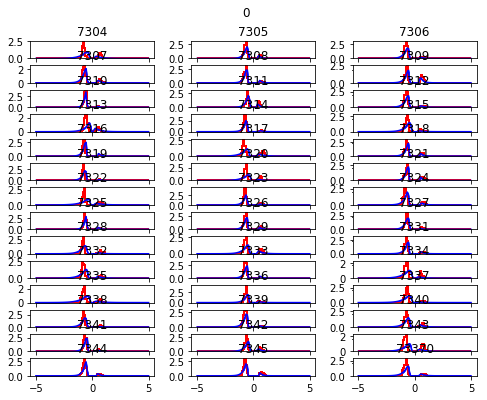

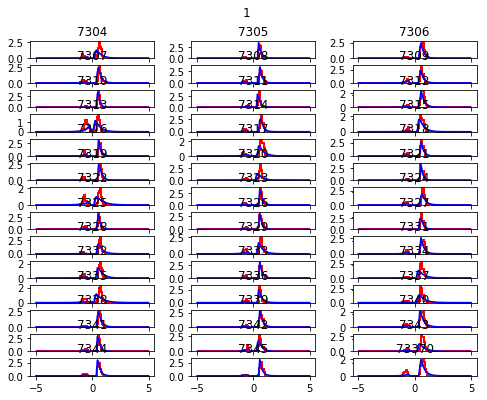

In [25]:
## plot posterior prediction
M_match_z_s.plot_posterior_predictive()
plt.savefig('ex7_rep_match_z_s_pp_plot.pdf')

In [16]:
## using absolute value for "bad" conditions 
print("P(v_M_GoodSelf > v_M_BadSelf ) = ", (v_GoodSelf_val.trace() > v_BadSelf_val.trace()).mean())         # 1
print("P(v_M_GoodOther > v_M_BadOther ) = ", (v_GoodOther_val.trace() > v_BadOther_val.trace()).mean())     # 0.5334
print("P(v_M_GoodSelf > v_M_GoodOther ) = ", (v_GoodSelf_val.trace() > v_GoodOther_val.trace()).mean())     # 1
print("P(v_M_BadSelf > v_M_BadOther ) = ", (v_BadSelf_val.trace() > v_BadOther_val.trace()).mean())         # 0.1227
print("P(v_M_GoodSelf > v_NM_BadSOther ) = ", (v_GoodSelf_val.trace() > v_BadOther_val_nm.trace()).mean())  # 0.917 

# using absolute value for "bad" conditions 
print("P(t_M_GoodSelf > t_M_BadSelf ) = ", (t_GoodSelf_val.trace() > t_BadSelf_val.trace()).mean())       # 0.9984
print("P(t_M_GoodOther > t_M_BadOther ) = ", (t_GoodOther_val.trace() > t_BadOther_val.trace()).mean())   # 0.081
print("P(t_M_GoodSelf > t_M_GoodOther ) = ", (t_GoodSelf_val.trace() > t_GoodOther_val.trace()).mean())   # 0.995
print("P(t_M_BadSelf > t_M_BadOther ) = ", (t_BadSelf_val.trace() > t_BadOther_val.trace()).mean())       # 0.037

print("P(z > 0.05) = ", (z_m.trace() > 0.5).mean()) 

P(v_M_GoodSelf > v_M_BadSelf ) =  1.0
P(v_M_GoodOther > v_M_BadOther ) =  0.533666666667
P(v_M_GoodSelf > v_M_GoodOther ) =  1.0
P(v_M_BadSelf > v_M_BadOther ) =  0.122666666667
P(v_M_GoodSelf > v_NM_BadSOther ) =  0.917555555556
P(t_M_GoodSelf > t_M_BadSelf ) =  0.202777777778
P(t_M_GoodOther > t_M_BadOther ) =  0.0168888888889
P(t_M_GoodSelf > t_M_GoodOther ) =  0.932444444444
P(t_M_BadSelf > t_M_BadOther ) =  0.566555555556
P(z > 0.05) =  1.0


Check the convergence of MCMC:

In [ ]:
# doing Gelman-Rubin statistic (time consuming)
models_match = []
for i in range(5):
    m_stim = hddm.HDDMStimCoding(dat_M_Categ_val, 
                                 include='z', 
                                 stim_col='stim',
                                 depends_on = {'v':['match','val','id'], 't':[['match','val','id']},
                                 split_param='v',drift_criterion=False)
    m_stim.find_starting_values()
    m_stim.sample(nsample, burn = nburn)
    models_match.append(m_stim)

Match_R_hat_vtz = hddm.analyze.gelman_rubin(models_match)

# save Categ_R_hat_vtz
with open('Match_R_hat_vtz_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Match_R_hat_vtz.items())
    